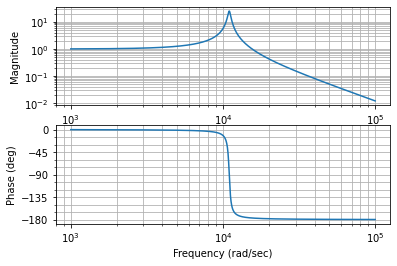

TransferFunction(array([1.20902654e+08]), array([1.00000000e+00, 4.39822972e+02, 1.20902654e+08]))

In [74]:
import control as ctrl
import matplotlib.pyplot as plt
import numpy as np
import tracetools as tt
import tf_freq_id

s = ctrl.tf('s')


G =  tt.sinu_tf.PT2(1750,0.02)
G

ctrl.bode(G)
plt.show()

G

TransferFunction(array([0.22824779, 0.45649559, 0.22824779]), array([ 1.        , -1.05379578,  0.96678696]), 0.0001)

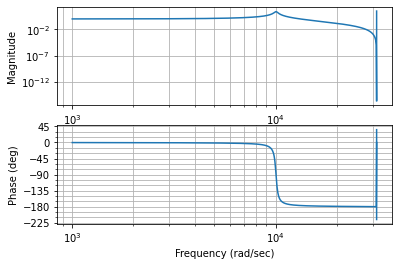

In [75]:


Ts = 1e-4
Gd = G.sample(Ts,method='tustin')



mag,phase,w = ctrl.bode(Gd,plot=False)

GY = mag*np.exp(1j*phase)


ctrl.bode(Gd)

Gd

$$
G(z) = \frac{b_0 + z^{-1}b_{-1} + ... + z^{-n}b_n}{1 + z^{-1}a_{-1} + ... + z^{-n}a_n}
$$

Freq resp 
$$z = e^{j\omega T_s}$$

Sampled points of $G$

$$
G(z=e^{j \omega_i T_s }= e^{j\Omega_i}) = Y_i = R_i e^{j\phi_i}
$$



$$
(1 + z^{-1}a_{-1} + ... + z^{-n}a_n) R_i e^{j\phi_i} = b_0 + z^{-1}b_{-1} + ... + z^{-n}b_n
$$

$$
(1 + e^{-j\Omega_i} a_{-1} + e^{-2j\Omega_i} a_{-2} ... + e^{-nj\Omega_i}a_n) R_i e^{j\phi_i} = b_0 + e^{-j\Omega_i}b_{-1} + ... + e^{-nj\Omega_i}b_n
$$

$$
(1 + e^{-j\Omega_i} a_{-1} + e^{-2j\Omega_i} a_{-2} ... + e^{-nj\Omega_i}a_n) R_i e^{j\phi_i} = b_0 + e^{-j\Omega_i}b_{-1} + ... + e^{-nj\Omega_i}b_n
$$

[0.22824779 0.45649559 0.22824779]
[ 1.         -1.05379578  0.96678696]


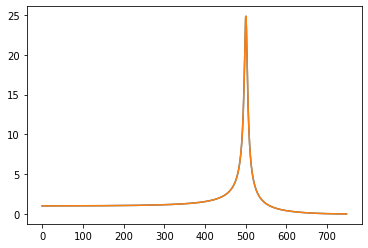

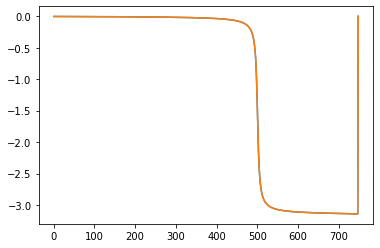

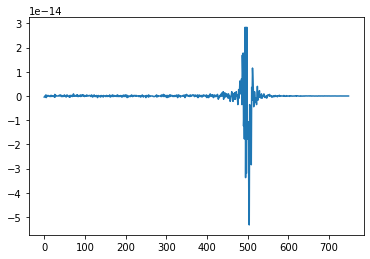

In [76]:
a = Gd.den[0][0]
b = Gd.num[0][0]

print(b)
print(a)

Y = []
assert a[0] == 1.0

for wk in w:

    Oi = wk*Ts
    bi = b[0] + np.exp(-1j*Oi)*b[1] + np.exp(-2j*Oi)*b[2]
    ai = a[0] + np.exp(-1j*Oi)*a[1] + np.exp(-2j*Oi)*a[2]

    yi = bi/ai 
    Y.append(yi)


Y = np.array(Y)

plt.plot(np.abs(GY))
plt.plot(np.abs(Y))

plt.figure()
plt.plot(np.angle(GY))
plt.plot(np.angle(Y))

mag_err = np.abs(GY) - np.abs(Y)

plt.figure()
plt.plot(mag_err)


$$
(1 + e^{-j\Omega_i} a_{-1} + e^{-2j\Omega_i} a_{-2} ... + e^{-nj\Omega_i}a_n) R_i e^{j\phi_i} = b_0 + e^{-j\Omega_i}b_{-1} + ... + e^{-nj\Omega_i}b_n
$$

$$
(R_ie^{j\phi_i} + R_ie^{j\phi_i -j\Omega_i} a_{-1} + R_ie^{j\phi_i-2j\Omega_i} a_{-2} ... + R_ie^{j\phi_i-nj\Omega_i}a_n)  = b_0 + e^{-j\Omega_i}b_{-1} + ... + e^{-nj\Omega_i}b_n
$$




## Real part
$$
(R_i \cos(\phi_i) + R_i\cos(\phi_i -\Omega_i) a_{-1} + R_i\cos(\phi_i-2\Omega_i) a_{-2} ... + R_i\cos(\phi_i-n\Omega_i)a_n)  = b_0 + \cos(-j\Omega_i)b_{-1} + ... + \cos(-nj\Omega_i)b_n
$$

## Imag part
$$
(R_i \sin(\phi_i) + R_i\sin(\phi_i -\Omega_i) a_{-1} + R_i\sin(\phi_i-2\Omega_i) a_{-2} ... + R_i\sin(\phi_i-n\Omega_i)a_n)  = b_0 + \sin(-j\Omega_i)b_{-1} + ... + \sin(-nj\Omega_i)b_n
$$

Text(0.5, 1.0, 'Error')

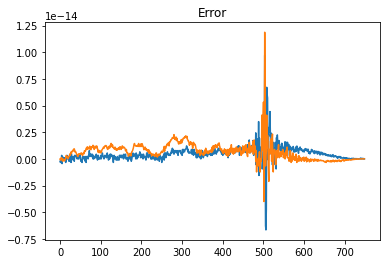

In [77]:

Jr = []
Ji = []

for i,wk in enumerate(w):

    Oi = wk*Ts
    Ri = mag[i]
    phi = phase[i]

    # Real part
    R1 = Ri*(np.cos(phi) + np.cos(phi - Oi)*a[1] + np.cos(phi - 2*Oi)*a[2])
    R2 = b[0] + np.cos(-Oi)*b[1] + np.cos(-2*Oi)*b[2]
    Jr.append(R1-R2) 

    # Img part
    I1 = Ri*(np.sin(phi) + np.sin(phi - Oi)*a[1] + np.sin(phi - 2*Oi)*a[2])
    I2 = np.sin(-Oi)*b[1] + np.sin(-2*Oi)*b[2] # NO b0!
    Ji.append(I1-I2) 


plt.plot(Jr)
plt.plot(Ji)
plt.title('Error')


In [78]:

n = 4


M = []
Y = []


for i,yi in enumerate(GY):


    Ri = mag[i]
    phi = phase[i]
    wk = w[i]   

    Oi = wk*Ts

    row1 = []

    # Real part

    #R1 = Ri*(np.cos(phi) + np.cos(phi - Oi)*a[1] + np.cos(phi - 2*Oi)*a[2])
    #R2 = b[0] + np.cos(-Oi)*b[1] + np.cos(-2*Oi)*b[2]

    for i in range(1,n):
        row1.append(-Ri*np.cos(phi - Oi*i))

    for i in range(0,n):
        if i == 0:
            row1.append(1.0)
        else:
            row1.append(np.cos(-Oi*i))


    row2 = []
    # Imag part
    #I1 = Ri*(np.sin(phi) + np.sin(phi - Oi)*a[1] + np.sin(phi - 2*Oi)*a[2])
    #I2 = np.sin(-Oi)*b[1] + np.sin(-2*Oi)*b[2] # NO b0!

    for i in range(1,n):
        row2.append(-Ri*np.sin(phi - Oi*i))

    for i in range(0,n):
        if i == 0:
            row2.append(0.0)
        else:
            row2.append(np.sin(-Oi*i))

    M.append(row1)
    M.append(row2)

    Y.append(Ri*np.cos(phi))
    Y.append(Ri*np.sin(phi))



sol = np.linalg.lstsq(M,Y,rcond=None)
theta = sol[0]
theta






array([-0.49860066,  0.38172468,  0.5367554 ,  0.22824779,  0.58321765,
        0.48169192,  0.12672206])

In [79]:
a = theta[0:n-1]
b = theta[n-1:]
print(b)
print(a)

a = np.r_[1,a]

Ge = ctrl.tf(b,a,Ts)
Ge



[0.22824779 0.58321765 0.48169192 0.12672206]
[-0.49860066  0.38172468  0.5367554 ]


TransferFunction(array([0.22824779, 0.58321765, 0.48169192, 0.12672206]), array([ 1.        , -0.49860066,  0.38172468,  0.5367554 ]), 0.0001)

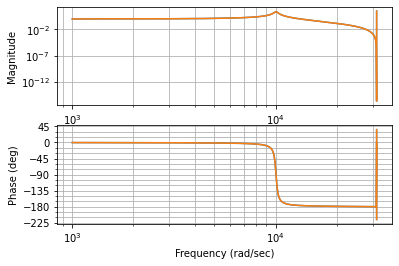

In [80]:
ctrl.bode(Gd)
ctrl.bode(Ge)
hej = 1